In [1]:
#Required packages
import pandas as pd

# Modelflow modules
from modelclass import model
   
#for publication 
latex=0
model.widescreen()

In [2]:

fsolow = '''\
Income          = a  * Capital**alfa * Labor **(1-alfa) 
Consumption     = (1-saving_rate)  * Income 
Investment      = Income - Consumption 
diff(Capital)   = Investment-Depreciation_rate * Capital(-1)
diff(Labor)     = Labor_growth * Labor(-1) 
Capital_intensity = Capital/Labor 
'''

In [3]:
msolow = model.from_eq(fsolow,modelname='Solow model')

In [4]:
msolow.print_model

FRML <> INCOME          = A  * CAPITAL**ALFA * LABOR **(1-ALFA)  $
FRML <> CONSUMPTION     = (1-SAVING_RATE)  * INCOME  $
FRML <> INVESTMENT      = INCOME - CONSUMPTION  $
FRML <> CAPITAL=CAPITAL(-1)+(INVESTMENT-DEPRECIATION_RATE * CAPITAL(-1))$
FRML <> LABOR=LABOR(-1)+(LABOR_GROWTH * LABOR(-1))$
FRML <> CAPITAL_INTENSITY = CAPITAL/LABOR  $


In [5]:
N = 300  
df = pd.DataFrame({'LABOR':[100]*N,
                   'CAPITAL':[100]*N, 
                   'ALFA':[0.5]*N, 
                   'A': [1]*N, 
                   'DEPRECIATION_RATE': [0.05]*N, 
                   'LABOR_GROWTH': [0.01]*N, 
                   'SAVING_RATE':[0.05]*N})
df.head(2) #this prints out the first 5 rows of the dataframe

LABOR  CAPITAL  ALFA  A  DEPRECIATION_RATE  LABOR_GROWTH  SAVING_RATE
0    100      100   0.5  1               0.05          0.01         0.05
1    100      100   0.5  1               0.05          0.01         0.05

In [6]:
result = msolow(df,keep='Baseline') # The model is simulated for all years possible 
result.head(29)

LABOR     CAPITAL  ALFA    A  DEPRECIATION_RATE  LABOR_GROWTH  \
0   100.000000  100.000000   0.5  1.0               0.05          0.01   
1   101.000000  100.025580   0.5  1.0               0.05          0.01   
2   102.010000  100.076226   0.5  1.0               0.05          0.01   
3   103.030100  100.151443   0.5  1.0               0.05          0.01   
4   104.060401  100.250762   0.5  1.0               0.05          0.01   
5   105.101005  100.373733   0.5  1.0               0.05          0.01   
6   106.152015  100.519926   0.5  1.0               0.05          0.01   
7   107.213535  100.688931   0.5  1.0               0.05          0.01   
8   108.285671  100.880357   0.5  1.0               0.05          0.01   
9   109.368527  101.093830   0.5  1.0               0.05          0.01   
10  110.462213  101.328993   0.5  1.0               0.05          0.01   
11  111.566835  101.585506   0.5  1.0               0.05          0.01   
12  112.682503  101.863045   0.5  1.0               0.05          0.01   
13  113.809328  102.161300   0.5  1.0               0.05          0.01   
14  114.947421  102.479976   0.5  1.0               0.05          0.01   
15  116.096896  102.818793   0.5  1.0               0.05          0.01   
16  117.257864  103.177483   0.5  1.0               0.05          0.01   
17  118.430443  103.555792   0.5  1.0               0.05          0.01   
18  119.614748  103.953478   0.5  1.0               0.05          0.01   
19  120.810895  104.370310   0.5  1.0               0.05          0.01   
20  122.019004  104.806070   0.5  1.0               0.05          0.01   
21  123.239194  105.260550   0.5  1.0               0.05          0.01   
22  124.471586  105.733554   0.5  1.0               0.05          0.01   
23  125.716302  106.224895   0.5  1.0               0.05          0.01   
24  126.973465  106.734397   0.5  1.0               0.05          0.01   
25  128.243200  107.261893   0.5  1.0               0.05          0.01   
26  129.525631  107.807224   0.5  1.0               0.05          0.01   
27  130.820888  108.370242   0.5  1.0               0.05          0.01   
28  132.129097  108.950808   0.5  1.0               0.05          0.01   

    SAVING_RATE  CONSUMPTION      INCOME  INVESTMENT  CAPITAL_INTENSITY  
0          0.05     0.000000    0.000000    0.000000           0.000000  
1          0.05    95.486029  100.511609    5.025580           0.990352  
2          0.05    95.986562  101.038487    5.051924           0.981043  
3          0.05    96.501546  101.580575    5.079029           0.972060  
4          0.05    97.030930  102.137821    5.106891           0.963390  
5          0.05    97.574667  102.710176    5.135509           0.955022  
6          0.05    98.132713  103.297593    5.164880           0.946943  
7          0.05    98.705029  103.900030    5.195002           0.939144  
8          0.05    99.291576  104.517449    5.225872           0.931613  
9          0.05    99.892323  105.149813    5.257491           0.924341  
10         0.05   100.507238  105.797092    5.289855           0.917318  
11         0.05   101.136294  106.459257    5.322963           0.910535  
12         0.05   101.779468  107.136282    5.356814           0.903983  
13         0.05   102.436738  107.828145    5.391407           0.897653  
14         0.05   103.108087  108.534829    5.426741           0.891538  
15         0.05   103.793501  109.256317    5.462816           0.885629  
16         0.05   104.492967  109.992597    5.499630           0.879920  
17         0.05   105.206478  110.743661    5.537183           0.874402  
18         0.05   105.934027  111.509502    5.575475           0.869069  
19         0.05   106.675612  112.290118    5.614506           0.863915  
20         0.05   107.431233  113.085509    5.654275           0.858932  
21         0.05   108.200894  113.895678    5.694784           0.854116  
22         0.05   108.984599  114.720631    5.736032           0.849459  
23         0

In [7]:
dfscenario = df.upd('LABOR_GROWTH + 0.002')  # create a new dataframe, increase LABOR_GROWTH by 0.002
scenario   = msolow(dfscenario,keep='Higher labor growth ') # simulate the model 

In [8]:
msolow['#ENDO']

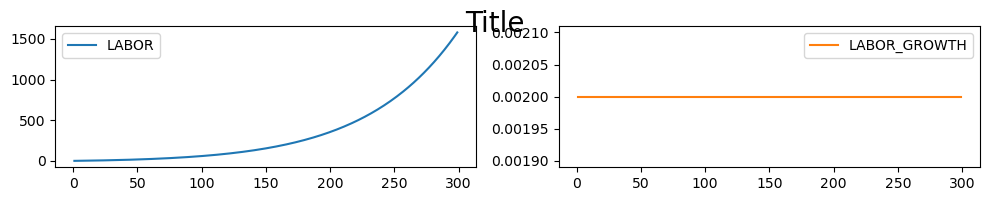

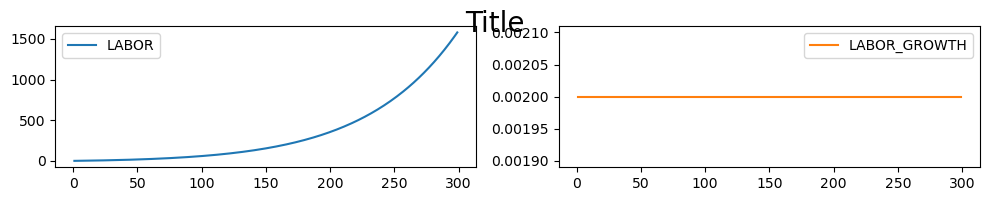

In [9]:
msolow['labor*'].dif.plot() 

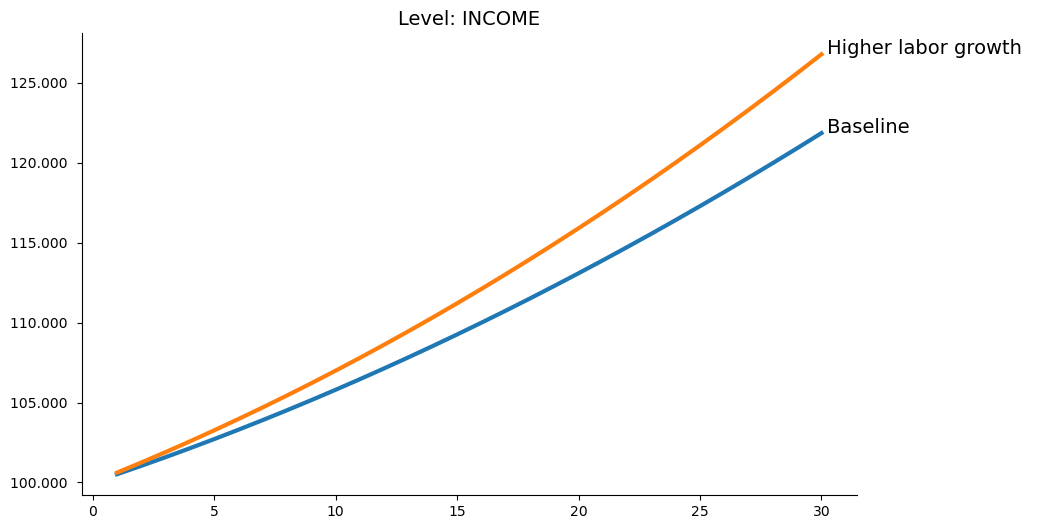

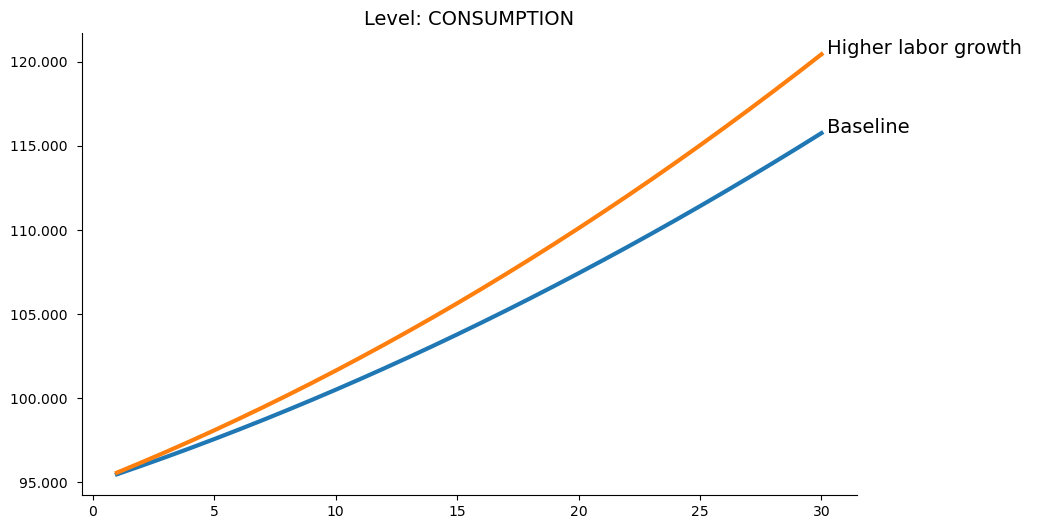

In [10]:
with msolow.set_smpl(1,30):
    msolow.keep_plot('income con*' ); 

In [11]:
msolow.modeldash('INCOME',jupyter=1)


apprun
Dash app running on http://127.0.0.1:5001/


Dash_graph(mmodel=<
Model name                              :          Solow model 
Model structure                         :         Simultaneous 
Number of variables                     :                   11 
Number of exogeneous  variables         :                    5 
Number of endogeneous variables         :                    6 
>, pre_var='INCOME', filter=0, up=1, down=0, time_att=False, attshow=False, all=False, dashport=5001, debug=False, jupyter=1, show_trigger=False, inline=False, lag=False, threshold=0.5, growthshow=False)

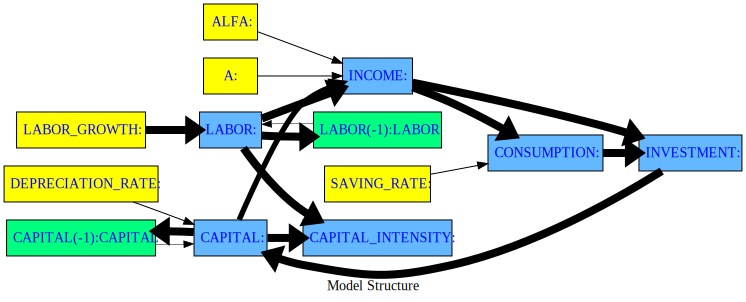

In [12]:
msolow.drawmodel( title="Model Structure", png=latex,size=(15,15))

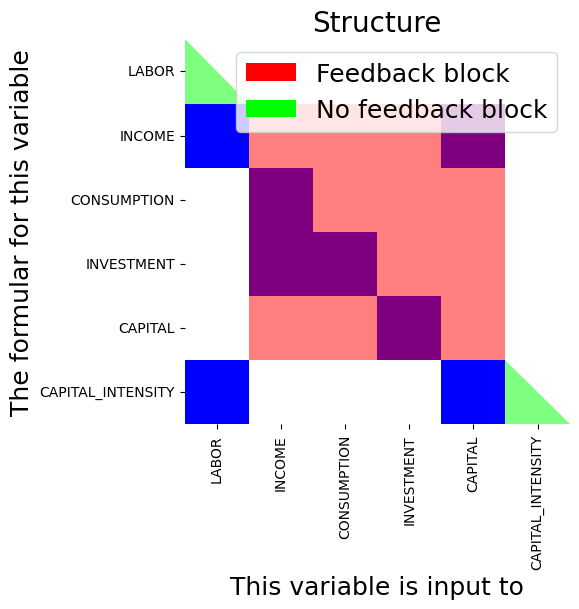

In [13]:
msolow.plotadjacency();

In [14]:
print(msolow.make_los_text)

def make_los(funks=[],errorfunk=None):
    import time
    import tqdm
    from numba import jit
    from modeluserfunk import jit, recode
    from modelBLfunk import array, classfunk, clognorm, exp, gamma, inspect, jit, lifetime_credit_loss, log, logit, logit_inverse, lognorm, matrix, mv_opt, mv_opt_prop, norm, normcdf, qgamma, sqrt, sum_excel, transpose
    def prolog0(values,outvalues,row,alfa=1.0):
        try :
            pass
            values[row,0]=values[row-1,0]+(values[row,5]*values[row-1,0])
        except :
            errorfunk(values,sys.exc_info()[2].tb_lineno,overhead=9,overeq=0)
            raise
        return 
    def prolog(values,outvalues,row,alfa=1.0):
        prolog0(values,outvalues,row,alfa=alfa)
        return  
    def core0(values,outvalues,row,alfa=1.0):
        try :
            pass
            values[row,8]=values[row,3]*values[row,1]**values[row,2]*values[row,0]**(1-values[row,2])
            values[row,7]=(1-values[row,6])*values[row,8]
           